# GLOBAL SUPERSTORE SALES ANALYSIS


## Table of contents
1. [Introduction](#intro)

2. [Assess the data](#assess)

    2.1 [Meta Data](#metadata)
    
    2.2 [Assessment Summary](#summary)

3. [Data Cleaning](#clean)

4. [Analysis and Data Visualization](#analysis)

    4.1 [Product Analysis](#product)

    4.2 [Segment Analysis](#segment)

    4.3 [Geographical market location Analysis](#market)

    4.4 [Shipping](#shipping)

    4.5 [Time Series Analysis](#time)

5. [Insights](#insights)

    5.1 [Findings](#findings)

    5.2 [Limitations](#limitation)

    5.3 [Recommendations](#recommendation)

## 1. Introduction
<a id='intro'></a>

A global superstore has given us the task to identify what works best for them in terms of sales and making profit. Using exploratory data analysis (EDA) we will help them identify:

1. Their most and least profitable product categories

2. Segment analysis of sales and profit

3. Geographical analysis of sales and profit

4. Performance trend over the years

Given the insights gained from the EDA, the superstore can choose to remove non-profitable products or invest in marketing efforts for products, segments and geographical areas that are driving their profit.

In [68]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

In [69]:
# import datasets
stores = pd.read_csv('Global_Superstore.csv',  encoding = 'unicode_escape', engine ='python')

## 2. Assess the data
<a id='assess'></a>

In [70]:
# data head
stores.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


### 2.1 Meta Data (Column Description)
<a id='metadata'></a>

1. **Row ID** Unique ID for each row.

2. **Order ID** Unique Order ID for each Order.

3. **Order Date**  Order Date of the product.

4. **Ship Date** Shipping Date of the Product.

5. **Ship Mode** Shipping Mode specified by the Customer.

6. **Customer ID** Unique ID to identify each Customer.

7. **Customer Name** Name of the Customer.

8. **Segment** The segment where the Customer belongs.

9. **Country** Country of residence of the Customer.

10. **City** City of residence of of the Customer.

11. **State** State of residence of the Customer.

12. **Postal Code** Postal Code of every Customer.

13. **Region** Region where the Customer belong.

14. **Product ID** Unique ID of the Product.

15. **Category** Category of the product ordered.

16. **Sub-Category** Sub-Category of the product ordered.

17. **Product Name** Name of the Product

18. **Sales** Sales of the Product.

19. **Quantity** Quantity of the Product.

20. **Discount** Discount provided.

21. **Profit** Profit/Loss incurred.

In [71]:
# data info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [72]:
# data summary statistics
stores.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [73]:
# columns data types
stores.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [74]:
# dataframe shape
stores.shape

(51290, 24)

In [75]:
# columns with missing data
stores.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [76]:
# rows with duplicated data
stores.duplicated().sum()

0

### 2.2 Assessment Summary
<a id='summary'></a>

The data has 51290 rows and 24 columns.

> **Missing Data:** Postal code column has missing data. Ignore, this is not necessary for the analysis.

> **Duplicates:** There are no duplicated rows.

> **Data types:** Order Date and Ship Date are strings.

## 3. Data Cleaning
<a id='clean'></a>

1. Make a copy of the data
2. For consistency, make column names snakecase & lowercase
3. Change data types 
    > Order Date & Shp Date from object to Datetime

    > Segment to Category

    > City, State, Country, Market, Region, Market to Category
    
    > Category, Sub Category to Category

4. Create new column sales_year

In [77]:
# make a copy of the data before cleaning
store = stores.copy()

In [81]:
# rename the column names to snake_case without spaces
store.columns = store.columns.str.replace(' ', '_').str.lower()
store.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [82]:
# confirm changes
store[['order_date', 'ship_date']].dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

In [83]:
# first order date
print('The first order date is: ' + str(store['order_date'].min()))

# final order date
print('The last order date is: ' + str(store['order_date'].max()))

The first order date is: 2011-01-01 00:00:00
The last order date is: 2014-12-31 00:00:00


In [84]:
# create a new column sales_year
store['sales_year'] = pd.DatetimeIndex(store['order_date']).year

In [85]:
# convert categorical columns data type from object to category
cols = ['ship_mode', 'segment', 'state', 'country', 'region', 'market', 'category', 'sub-category', 'order_priority']

store[cols] = store[cols].astype('category')

In [86]:
# confirm changes
store.dtypes

row_id                     int64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode               category
customer_id               object
customer_name             object
segment                 category
city                      object
state                   category
country                 category
postal_code              float64
market                  category
region                  category
product_id                object
category                category
sub-category            category
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority          category
sales_year                 int64
dtype: object

## 4. Analysis and Data Visualization
<a id='analysis'></a>

### 4.1 Product analysis { category }
<a id='product'></a>

1. Total sales per category 

In [87]:
# group total sales by category from the highest sale.
sales_category = store.groupby('category')['sales'].sum().sort_values(ascending=False)
sales_category

category
Technology         4.744557e+06
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Name: sales, dtype: float64

2. Total profits per Category

In [88]:
# group total profits by category
profit_category = store.groupby('category')['profit'].sum().sort_values(ascending=False)
profit_category

category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: profit, dtype: float64

3. Plot pie charts showing percentage of categories in sales and profit totals.

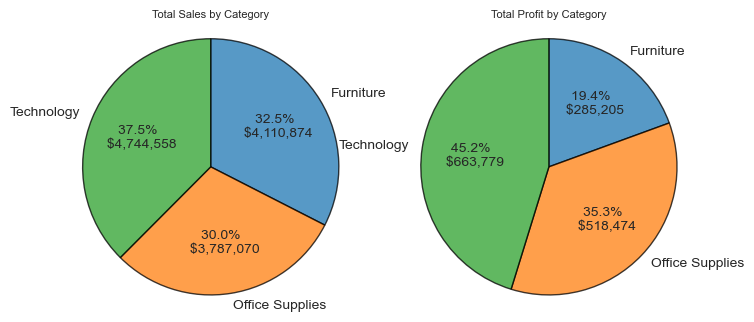

In [89]:
# group total sales by category
sales_category = store.groupby('category')['sales'].sum()

# group total profits by category
profit_category = store.groupby('category')['profit'].sum()


# figure size
plt.figure(figsize=(8,8));

# left total sales pie chart
plt.subplot(1,2,1); # 1 row, 2 columns, the 1st plot.
plt.pie(sales_category.values, labels=sales_category.index, startangle=90, counterclock=False,
        autopct=lambda p:f'{p:.1f}% \n ${p*np.sum(sales_category.values)/100 :,.0f}', 
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.75});
plt.axis('square');
plt.title('Total Sales by Category',  fontdict={'fontsize':8});

# right total profits pie chart
plt.subplot(1,2,2); # 1 row, 2 columns, the 2nd plot
plt.pie(profit_category.values, labels=profit_category.index, startangle=90, counterclock=False,
        autopct=lambda p:f'{p:.1f}% \n ${p*np.sum(profit_category.values)/100 :,.0f}',
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.75});
plt.axis('square');
plt.title('Total Profit by Category', fontdict={'fontsize':8});


 > _Total sales_

1. Technology at 37.5% 
2. Furniture at 32.5%
3. Office supplies at 30%

The sales are almost divided equally among the three categories. Each category account for over 30% of total sales

 > _Total profits_

1. Technology at 45.2%
2. Office supplies at 35.3%
3. Furniture at 19.4%

Interestingly, Furniture has a lower percentage of profits raked in compared to its share of percentage sale.

Let us look at the subcategories to understand which subcategories contribute to lower profits for furniture and which sub categories contribute to higher profits for the Technology category.

In [90]:
#Grouping the data on category and it's respective sub-categories. Calculating the profit margin.
sales_per_subcategory = store.groupby(['category', 'sub-category'], as_index=False)[['sales', 'profit']].sum()

# create and calculate a new column. The profit margin
sales_per_subcategory['profit_margin'] = sales_per_subcategory['profit'] / sales_per_subcategory['sales']

# sort the dataframe by the profit margin.
sales_per_subcategory =  sales_per_subcategory.sort_values(by='profit_margin', ascending=False)

sales_per_subcategory 

,category,sub-category,sales,profit,profit_margin
29,Office Supplies,Paper,2.442917e+05,59207.68270,0.242365
27,Office Supplies,Labels,7.340403e+04,15010.51200,0.204492
24,Office Supplies,Envelopes,1.709043e+05,29601.11630,0.173203
34,Technology,Accessories,7.492370e+05,129626.30620,0.173011
40,Technology,Copiers,1.509436e+06,258567.54818,0.171301
20,Office Supplies,Binders,4.619115e+05,72449.84600,0.156848
19,Office Supplies,Art,3.720920e+05,57953.91090,0.155752
18,Office Supplies,Appliances,1.011064e+06,141680.58940,0.140130
25,Office Supplies,Fasteners,8.324232e+04,11525.42410,0.138456
47,Technology,Phones,1.706824e+06,216717.00580,0.126971


1. Plot a graph depicting profit margins of different subcategories. 

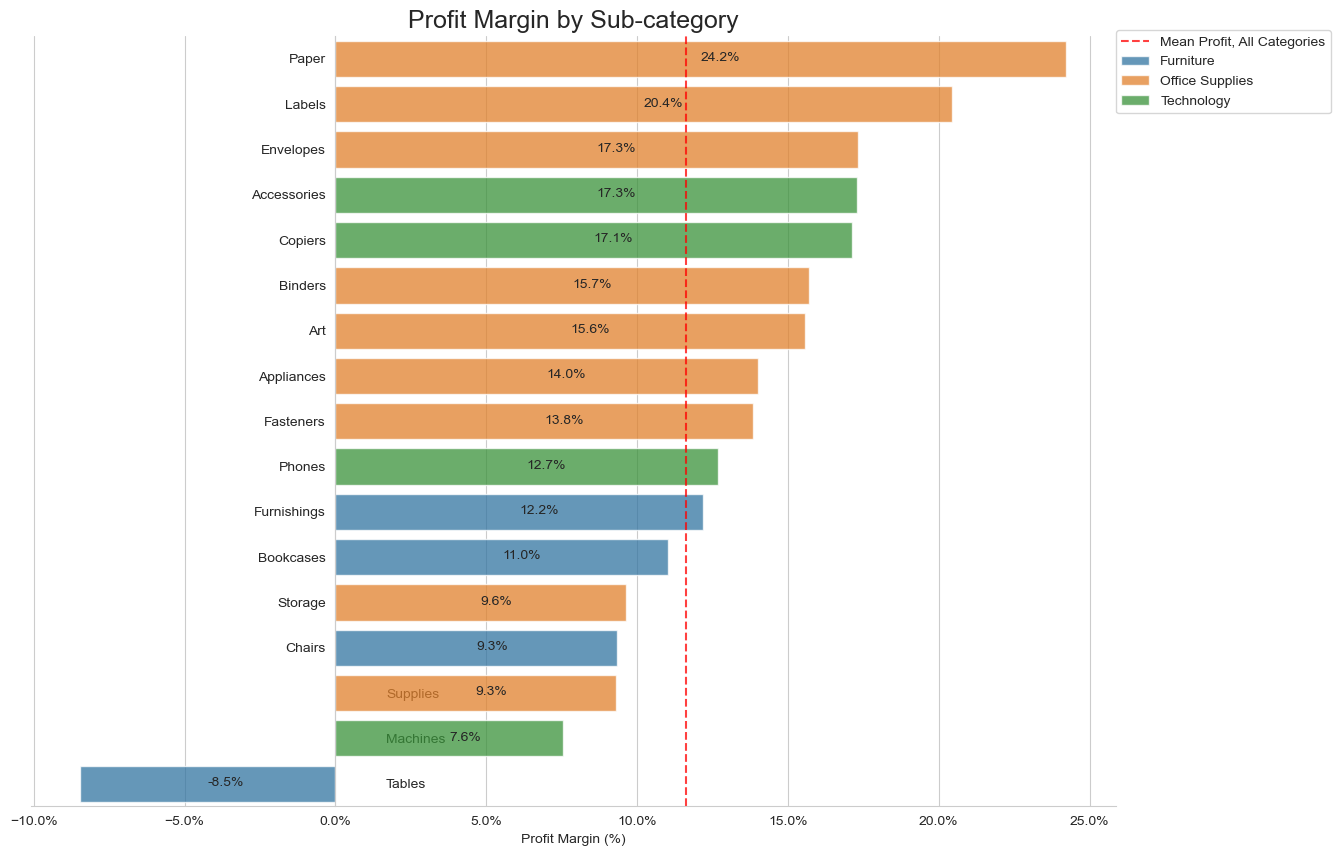

In [91]:
#Grouping the data on category and it's respective sub-categories. Calculating the profit margin.
sales_per_subcategory =store.groupby(['category', 'sub-category'], as_index=False)[['sales', 'profit']].sum()
sales_per_subcategory['profit_margin'] = sales_per_subcategory['profit'] / sales_per_subcategory['sales']

#Sorting the dataframe based on profit margin
sales_per_subcategory = sales_per_subcategory.sort_values(by='profit_margin', ascending=False)


# plot a profit margins sub-category bar chart 
fig, ax = plt.subplots(figsize=(14,10))

#Plotting the profit margin per sub-category.
sns.barplot(y=sales_per_subcategory['sub-category'], x=sales_per_subcategory['profit_margin'], hue=sales_per_subcategory['category'], 
            order=['Paper','Labels','Envelopes','Accessories','Copiers','Binders','Art','Appliances','Fasteners','Phones','Furnishings',
                    'Bookcases','Storage','Chairs','Supplies','Machines','Tables'],alpha=0.75, dodge=False, ax=ax)

#Cleaning out bar junk
ax.spines['left'].set_position('zero')
ax.spines[['right','top']].set_visible(False)
ax.set(ylabel=None, xlabel='Profit Margin (%)')


def move_ylabel_tick(index: list):
    """
    Moving the provided ylabel ticks
    """
    for tick in index:
        ax.get_yticklabels()[tick].set_x(0.02)
        ax.get_yticklabels()[tick].set_horizontalalignment('left')

#Moving the y-labels on sub-categories that are making a loss in order to prevent collision of the bar and the text.
move_ylabel_tick([-1, -2, -3])


#Annotating the profit margin amount for each bar.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f'{p.get_width()*100 :.1f}%', (p.get_width() / 2, y+0.45))
    
#Calculating Superstore's aggregate profit margin in order to compare it to each sub-category's profit margin
mean_profit = sales_per_subcategory['profit'].sum() / sales_per_subcategory['sales'].sum()

#Plotting a vertical line and annotating the Superstore's aggregate profit margin.
ax.axvline(mean_profit, color='red', label='Mean Profit, All Categories', alpha=0.75, ls='--')

#Setting the title and legend.
ax.set_title('Profit Margin by Sub-category', fontdict={'fontsize':18})
ax.legend(loc=(1, 0.9))

#Formatting the x-axis as %
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

From the analysis, only one sub category is making a loss. That is tables subcategory from the furniture category. This explains the low profit percentages from the furniture category despite high sales. 

Mean profit margin is at 11.6 % The top three highest profit margins are in the office supplies sector. 11 out of 17 subsectors have profit margins above the mean profit margin. 

Investigate products in the tables sub category that are not doing well 

In [92]:
# create a data frame for the tables sub category and its respective products
tables = store.groupby(['sub-category', 'product_name']).sum().loc['Tables', :]

# calculate the profit margin
tables['profit_margin'] = tables['profit'] / tables['sales']

# sort the dataframe from highest profit margins
tables = tables.sort_values(by='profit_margin', ascending=False)
tables = tables.reset_index()
tables

C:\Users\Priya\AppData\Local\Temp\ipykernel_13932\3776351942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tables = store.groupby(['sub-category', 'product_name']).sum().loc['Tables', :]


,product_name,row_id,postal_code,sales,quantity,discount,profit,shipping_cost,sales_year,profit_margin
0,"Chromcraft Computer Table, Adjustable Height",139990,0.0,7582.967,22,1.45,3009.107,863.18,14088,0.396824
1,"Barricks Coffee Table, with Bottom Storage",8818,0.0,1125.600,7,0.20,379.820,180.27,2012,0.337438
2,"Hon Training Table, Adjustable Height",144087,0.0,5726.619,19,0.95,1911.789,472.02,10063,0.333843
3,"Chromcraft Computer Table, Rectangular",6479,0.0,1411.200,6,0.20,405.720,262.11,2013,0.287500
4,"Bevis Conference Table, Rectangular",58707,0.0,3685.320,7,0.90,1037.920,228.12,6038,0.281636
...,...,...,...,...,...,...,...,...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,0,0.0,0.000,0,0.00,0.000,0.00,0,NaN
3784,iOttie HLCRIO102 Car Mount,0,0.0,0.000,0,0.00,0.000,0.00,0,NaN
3785,iOttie XL Car Mount,0,0.0,0.000,0,0.00,0.000,0.00,0,NaN
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,0,0.0,0.000,0,0.00,0.000,0.00,0,NaN


In [93]:
# lets look at the tables sold
table_sales = tables[tables['sales'] != 0]
table_sales

,product_name,row_id,postal_code,sales,quantity,discount,profit,shipping_cost,sales_year,profit_margin
0,"Chromcraft Computer Table, Adjustable Height",139990,0.0,7582.9670,22,1.45,3009.1070,863.18,14088,0.396824
1,"Barricks Coffee Table, with Bottom Storage",8818,0.0,1125.6000,7,0.20,379.8200,180.27,2012,0.337438
2,"Hon Training Table, Adjustable Height",144087,0.0,5726.6190,19,0.95,1911.7890,472.02,10063,0.333843
3,"Chromcraft Computer Table, Rectangular",6479,0.0,1411.2000,6,0.20,405.7200,262.11,2013,0.287500
4,"Bevis Conference Table, Rectangular",58707,0.0,3685.3200,7,0.90,1037.9200,228.12,6038,0.281636
...,...,...,...,...,...,...,...,...,...,...
165,"Barricks Conference Table, Rectangular",112265,0.0,3663.8325,10,1.05,-2487.9675,472.26,6040,-0.679061
166,"Bevis Training Table, with Bottom Storage",42177,0.0,669.9600,5,1.20,-482.4600,115.25,4024,-0.720133
167,"Lesro Training Table, Rectangular",89585,0.0,2711.6466,25,2.91,-2581.2834,168.47,10066,-0.951925
168,"Chromcraft Coffee Table, Fully Assembled",37993,0.0,1226.4240,19,2.35,-1960.6960,167.08,8051,-1.598710


In [ ]:
# how many profitable table products have we?
mean_profit = sales_per_subcategory['profit'].sum() / sales_per_subcategory['sales'].sum()

def profitable_items(category_dict: dict):
    """
    Function to print the amount of items that have a higher profit margin than the company average
    """
    
    for df_name, df in category_dict.items():

        print(f"""{df_name} has {len(df[df['profit_margin'] > mean_profit])} items (out of {len(df)}) with a profit margin higher than the company average.""")
    
profitable_items({"Tables":table_sales})

20 out of 170 is quite a low number 

### 4.2 Segment Analysis
<a id='segment'></a>

In [ ]:
# Which segment contributes the most sales?
sales_by_segment = store.groupby('segment').sum()
sales_by_segment

In [ ]:
# Which segment contributes the most sales?
segment_counts = store['segment'].value_counts()
segment_counts

sales_by_segment = store.groupby('segment').sum()
sales_by_segment

# # plot a pie chart
plt.figure(figsize = [5,4])

plt.pie(sales_by_segment['sales'], labels=sales_by_segment.index, startangle=90, counterclock=False,
        wedgeprops={'linewidth':1, 'edgecolor':'black', 'alpha':1},
        autopct=lambda p: f'{p: .1f}% \n ${p*np.sum(sales_by_segment.sales)/100 :,.0f}');

plt.title('Share of sales per segment', fontdict={'fontsize':5});

In [ ]:
sales_by_segment

In [94]:
# barchart of the three segments with profit margin percentages

# create a new column profit_margin
sales_by_segment['profit_margin'] = sales_by_segment['profit'] / sales_by_segment['sales']
sales_by_segment
# subset segment, quantity, profit, profit_margin
sales_by_segment = sales_by_segment[['quantity', 'profit', 'profit_margin']].reset_index()
sales_by_segment 

,segment,quantity,profit,profit_margin
0,Consumer,92157,749239.78206,0.115127
1,Corporate,53565,441208.32866,0.115358
2,Home Office,32590,277009.18056,0.119925


Among the segments, Home Office has the highest profit margin percent. Both consumer and corporate segments have equal percent margins of 11.5%

C:\Users\Priya\AppData\Local\Temp\ipykernel_13932\4240341434.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_category = store.groupby(['segment', 'category'], as_index=False).sum()


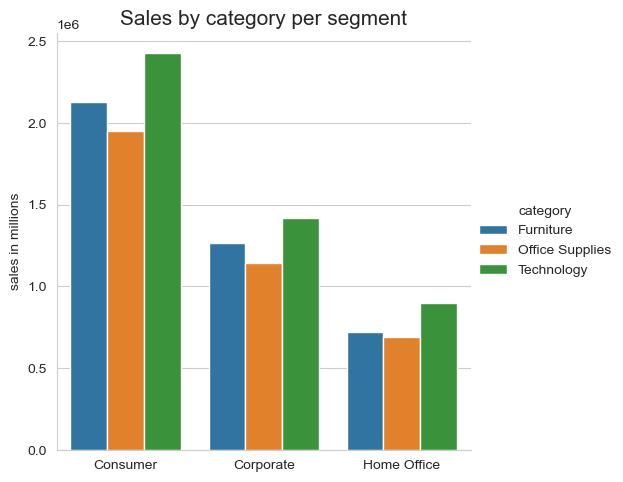

In [95]:
# sales by category per segment

# group by segment and category
from re import L


segment_category = store.groupby(['segment', 'category'], as_index=False).sum()


# plot a barplot of segment by sales using category as the hue

sns.catplot(data=segment_category, x='segment', y='sales', kind='bar', hue='category');
plt.title('Sales by category per segment', fontdict={'fontsize':15});
plt.xlabel(None);
plt.ylabel('sales in millions');

The consumer segment contributes the highest revenue, then corporate and lastly home office. In each of the three segments, Technology leads in sales followed by furniture and finally office supplies .

### 4.3 Geographical Market Location Analysis
<a id='market'></a>


_Global market locations_

**APAC** Asia Pacific Market. encompasses East Asia, South Asia, Southeast Asia, and Oceania.

**EU** European Union. 

**US** United States Market

**LATAM** Latin American Markets

**EMEA** The (Europe, Middle East, Africa) market

**Africa** African market

**Canada** Canada

1. How do sales compare in different locations?

In [96]:
# group store data by market
sales_by_market = store.groupby('market', as_index=False).sum().sort_values(by='sales', ascending=False)

# calculate profit margins
sales_by_market['profit_margin'] = sales_by_market['profit'] / sales_by_market['sales']

sales_by_market

C:\Users\Priya\AppData\Local\Temp\ipykernel_13932\3435973397.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_market = store.groupby('market', as_index=False).sum().sort_values(by='sales', ascending=False)


,market,row_id,postal_code,sales,quantity,discount,profit,shipping_cost,sales_year,profit_margin
0,APAC,283802091,0.0,3.585744e+06,41226,1637.530,436000.04900,387165.11,22144565,0.121593
4,EU,152945000,0.0,2.938089e+06,37773,1031.050,372829.74150,309422.35,20127961,0.126895
6,US,362717239,551572652.0,2.297201e+06,37873,1561.090,286397.02170,238173.79,20115153,0.124672
5,LATAM,52988365,0.0,2.164605e+06,38526,1395.158,221643.48708,234138.61,20719523,0.102394
3,EMEA,233028207,0.0,8.061613e+05,11517,986.100,43897.97100,88375.73,10122436,0.054453
1,Africa,212025742,0.0,7.837732e+05,10564,718.800,88871.63100,88139.47,9232799,0.113389
2,Canada,17851051,0.0,6.692817e+04,833,0.000,17817.39000,7405.63,772906,0.266217


2. Plot a sales visual showing market sales. 

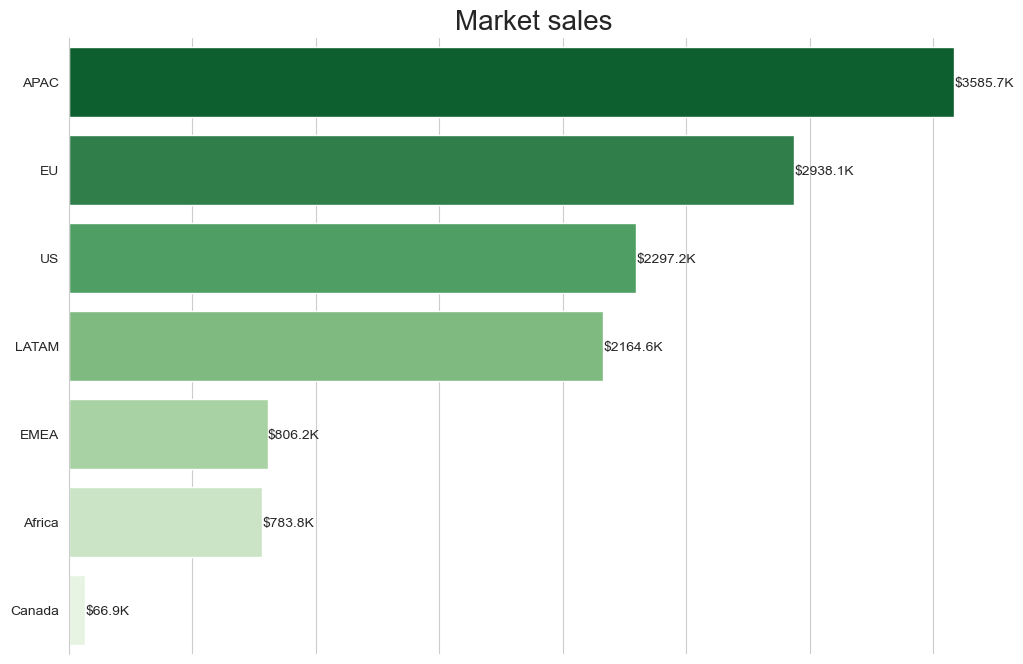

In [97]:
# plot the graph
fig, ax = plt.subplots(figsize=(12,8));

# plot sales per market
sns.barplot(x=sales_by_market['sales'], y=sales_by_market['market'], palette='Greens_r',
             order=sales_by_market.sort_values(by='sales', ascending=False)['market']);
plt.title('Market sales', fontdict={'fontsize':20});

#Annotating the sales.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f"${p.get_width() / 1000 :.1f}K", xy=(p.get_width(), y+0.45))
    
#Removing bar junk
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.set(ylabel=None, xlabel=None)
ax.tick_params(labelbottom=None, bottom=None)

In [98]:
# profits in different Markets
store.groupby('market')['profit'].sum().sort_values(ascending=False)

market
APAC      436000.04900
EU        372829.74150
US        286397.02170
LATAM     221643.48708
Africa     88871.63100
EMEA       43897.97100
Canada     17817.39000
Name: profit, dtype: float64

In [99]:
# profit in different countries
profit_by_market = store.groupby('market', as_index=False).sum().sort_values(by='profit', ascending=False)

# calculate profit margins
profit_by_market['profit_margin'] = profit_by_market['profit'] / profit_by_market['sales']

profit_by_market

C:\Users\Priya\AppData\Local\Temp\ipykernel_13932\2510326509.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_by_market = store.groupby('market', as_index=False).sum().sort_values(by='profit', ascending=False)


,market,row_id,postal_code,sales,quantity,discount,profit,shipping_cost,sales_year,profit_margin
0,APAC,283802091,0.0,3.585744e+06,41226,1637.530,436000.04900,387165.11,22144565,0.121593
4,EU,152945000,0.0,2.938089e+06,37773,1031.050,372829.74150,309422.35,20127961,0.126895
6,US,362717239,551572652.0,2.297201e+06,37873,1561.090,286397.02170,238173.79,20115153,0.124672
5,LATAM,52988365,0.0,2.164605e+06,38526,1395.158,221643.48708,234138.61,20719523,0.102394
1,Africa,212025742,0.0,7.837732e+05,10564,718.800,88871.63100,88139.47,9232799,0.113389
3,EMEA,233028207,0.0,8.061613e+05,11517,986.100,43897.97100,88375.73,10122436,0.054453
2,Canada,17851051,0.0,6.692817e+04,833,0.000,17817.39000,7405.63,772906,0.266217


C:\Users\Priya\AppData\Local\Temp\ipykernel_13932\4227972591.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


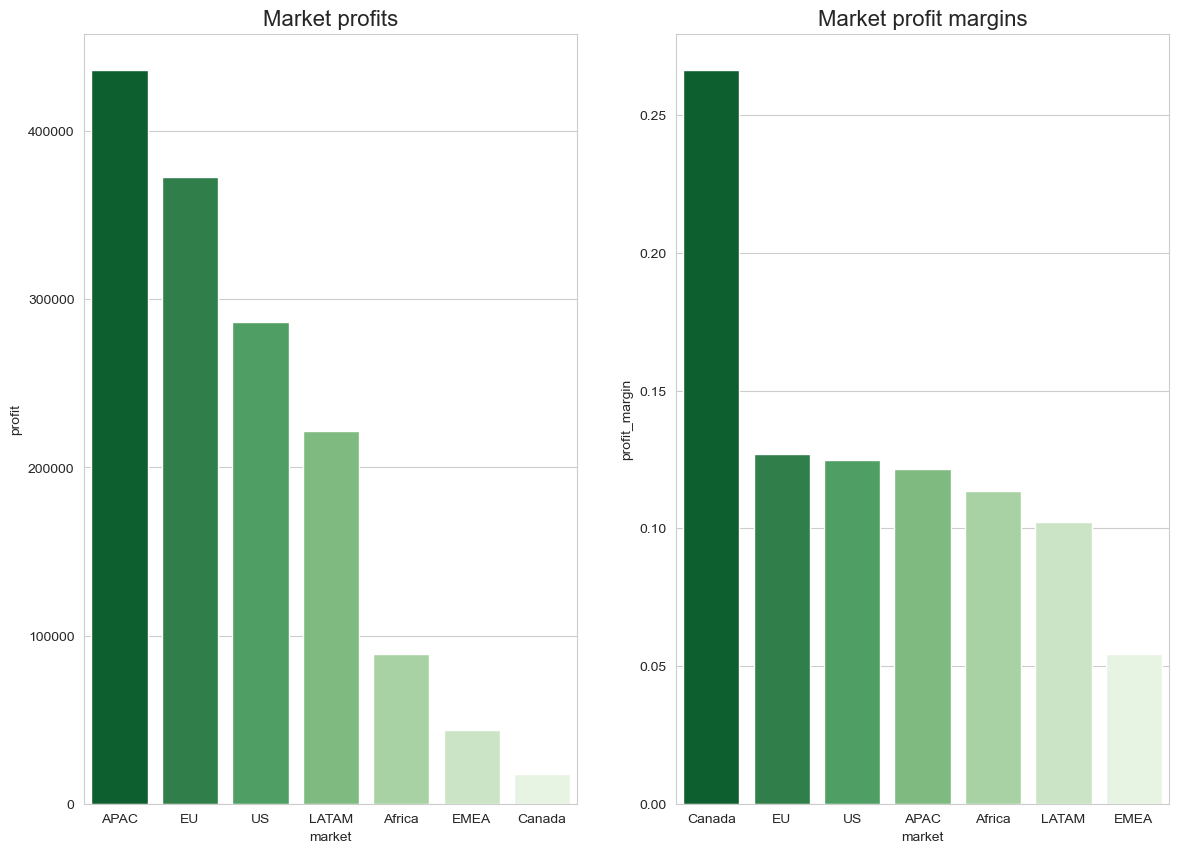

In [100]:
fig, ax =  plt.subplots(figsize=(14,10))

# left profits subplot
plt.subplot(1,2,1)
sns.barplot(x=profit_by_market['market'], y=profit_by_market['profit'], palette='Greens_r', 
            order=profit_by_market.sort_values('profit', ascending=False)['market']);
plt.title('Market profits', fontdict={'fontsize':16});


# right profit margins subplot
plt.subplot(1,2,2)
sns.barplot(x=profit_by_market['market'], y=profit_by_market['profit_margin'],palette='Greens_r', 
            order=profit_by_market.sort_values('profit_margin', ascending=False)['market']);
plt.title('Market profit margins', fontdict={'fontsize':16});



### 4.4 Shipping
<a id='shipping'></a>

In [101]:
# average shipping cost in different markets from lowest
store.groupby('market')['shipping_cost'].mean().sort_values()

market
EMEA      17.573221
Africa    19.215058
Canada    19.285495
LATAM     22.745153
US        23.831678
EU        30.942235
APAC      35.190430
Name: shipping_cost, dtype: float64

In [102]:
# How long does it take to ship products 
# add a new column shipment_days
store['shipment_days'] = store['ship_date'] - store['order_date']

In [103]:
# shipment days on average in different markets
store.groupby('market')['shipment_days'].mean().sort_values()

market
Africa   2 days 13:45:00.588620013
LATAM    3 days 15:09:58.018263065
EU          3 days 17:10:19.200000
APAC     4 days 11:41:56.269769132
US       8 days 00:41:12.523514108
EMEA     8 days 02:43:29.982103798
Canada             9 days 18:15:00
Name: shipment_days, dtype: timedelta64[ns]

### 4.5 Time Series Analysis
<a id= 'time'></a>

In [104]:
# sales trend
sales_trend = store.groupby('sales_year', as_index=False)['sales'].sum()
sales_trend

,sales_year,sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


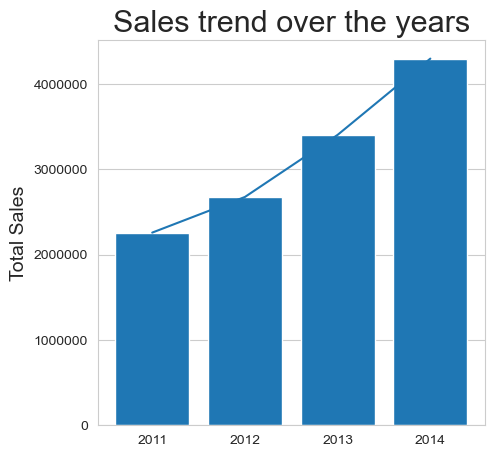

In [105]:
# plot total profit trends
fig, ax = plt.subplots(figsize=(5,5))


ax.bar(x=sales_trend.sales_year, height=sales_trend.sales);
ax.plot(sales_trend.sales_year,sales_trend.sales);
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title('Sales trend over the years', fontsize=22);
plt.ylabel('Total Sales', fontsize=14)
plt.xticks([2011,2012,2013,2014]);
plt.grid(axis='x');

In [106]:
# profit trend
profit_trend = store.groupby('sales_year', as_index=False)['profit'].sum()
profit_trend

,sales_year,profit
0,2011,248940.81154
1,2012,307415.27910
2,2013,406935.23018
3,2014,504165.97046


In [107]:
profit_trend['sales_year'] = profit_trend['sales_year'].astype('category')
profit_trend

,sales_year,profit
0,2011,248940.81154
1,2012,307415.27910
2,2013,406935.23018
3,2014,504165.97046


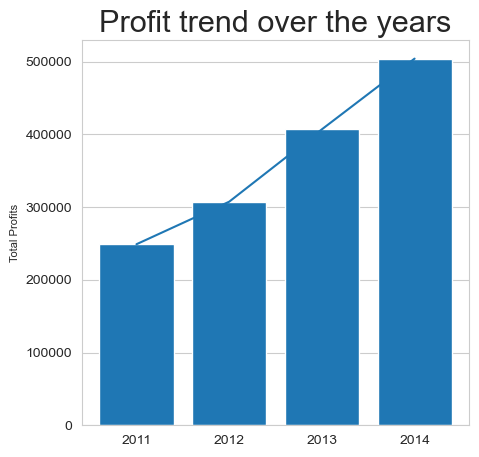

In [108]:
# plot total profit trends
fig, ax = plt.subplots(figsize=(5,5))
sns.set_style('whitegrid')

plt.bar(x=profit_trend.sales_year, height=profit_trend.profit);
plt.plot(profit_trend.sales_year,profit_trend.profit);
plt.title('Profit trend over the years', fontsize=22);
plt.ylabel('Total Profits', fontsize=8)
plt.xticks([2011,2012,2013,2014]);
plt.grid(axis='x');

## 5. Insights
<a id='insights'></a>

### 5.1 Findings
<a id='findings'></a>

1. Categories and sub categories.

The three categories all account for over 30% of sales. Technology-37.5%, Furniture-32.5%, Office Supplies 30%. Technology accounts for the highest total profits (almost half) at 45.2%. Office supplies profits are at 35.3% while furniture is at 19.4% profit. 
Why do furniture contribute to such low profits yet has high sales?

Furniture category has 4 subcategories ('Furnishes', 'bookcases', 'chairs', and 'tables') Only 'Furnishes' (12.2%) has a profit margin above the average profit margin of sub-categories (11.6%). Bookcases has an 11% profit margin, and chairs 9.3%. Tables sub-category is infact making a loss. It records a -8.5% profit margin. This is where Global Superstore is losing money.

2. Segments

Global superstore has three main segments. Consumer, Corporate and Home office. The consumer segment accounts for over 6.5Million dollars in sales 51.5%. Corporate 30.3% while Home Office 18.3%. Profit margins among the segments is almost equal. Both consumer and corporate have 11.5% profit margins. Home Office segment has a 12.5% profit margin. In all segments, sale demand decreses from technology, furniture and office supply in that order.

3. Geographical Markets

Gobal stores largest market is APAC. The Asia Pacific market at $3585.7K, then the EU market $2938.1K, The US market $2297.2K,
LATAM $2164.6K, EMEA $806.2K, Africa $783.8K, Canada $66.9K. Canada has the lowest sales but highest percent profit margins among the markets. Global stores has a presence in major markets with profit margins mainly ranging between 10 to 14%. EMEA market has an uncharacteristic low profits and lower profit margin than the rest of the markets. 

4. Time series

Global stores has experienced growth in sales and profits gradually from 2011 to 2014. If this trend continues, the future is bright for the business. 

### 5.2 Limitations
<a id = 'limitations'></a>

The data lacks population numbers for the different regions. Demographic information would have let us know markets where Global store is most popular and markets where more advertising and marketing needs to take place. Markets with high populations are likely to record high sales by default. This however doesn't represent the actual market share in comparison with key competitors.

### 5.3 Recommendations
<a id='recommendations'></a>

From the analysis, the tables sub-category is making losses. Only 20 out of 170 table types generate a profit margin that is higher than the company's average profit margin. Global stores can continue selling the 20 profitable unique tables. On the other hand, the loss making tables can be gradually removed from the online shelfs for higher profitability. 